In [1]:
import os
import sys
import warnings
from pathlib import Path

project_root = Path.cwd().parents[0]
sys.path.append(str(project_root))

import dotenv
import matplotlib.pyplot as plt
import torchinfo
from lightning import Trainer

from project.datasets.dummy import FashionMNISTDataModule
from project.models.dummy import FashionMNISTClassifier

warnings.filterwarnings("ignore")

In [2]:
dotenv.load_dotenv()

datasets_root = Path(os.environ.get("DATASETS_ROOT", "."))
assert datasets_root.is_dir()

In [3]:
datamodule = FashionMNISTDataModule(datasets_root)

In [4]:
model = FashionMNISTClassifier()
torchinfo.summary(model, input_size=(32, 1, 28, 28), col_names=("input_size", "output_size", "num_params", "params_percent"))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
FashionMNISTClassifier                   [32, 1, 28, 28]           [32, 10]                  --                             --
├─Sequential: 1-1                        [32, 1, 28, 28]           [32, 10]                  --                             --
│    └─Conv2d: 2-1                       [32, 1, 28, 28]           [32, 128, 26, 26]         1,280                       0.35%
│    └─BatchNorm2d: 2-2                  [32, 128, 26, 26]         [32, 128, 26, 26]         256                         0.07%
│    └─ReLU: 2-3                         [32, 128, 26, 26]         [32, 128, 26, 26]         --                             --
│    └─MaxPool2d: 2-4                    [32, 128, 26, 26]         [32, 128, 13, 13]         --                             --
│    └─Conv2d: 2-5                       [32, 128, 13, 13]         [32, 256, 11, 11]         295,168           

In [5]:
trainer = Trainer(max_epochs=20)
trainer.fit(model, datamodule)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | network | Sequential | 361 K 
---------------------------------------
361 K     Trainable params
0         Non-trainable params
361 K     Total params
1.445     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.


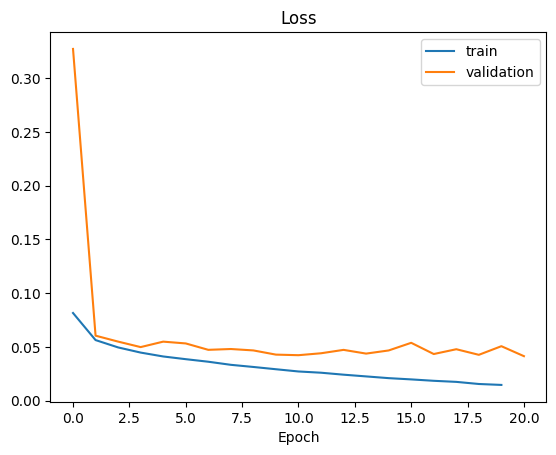

In [6]:
plt.title("Loss")
plt.xlabel("Epoch")
plt.plot(model.train_epoch_losees, label="train")
plt.plot(model.valid_epoch_losees, label="validation")
plt.legend()
plt.show()

In [7]:
trainer.test(model, datamodule)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.04633123427629471    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.04633123427629471}]